<a href="https://colab.research.google.com/github/patel-star/Gen-AI/blob/main/Image_Classification_Basic_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
# import the fashion image dataset
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist_dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape
#60k data points with 28x28 size

x_test.shape
# 10k data point with 28x28 size

(10000, 28, 28)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle_boot']

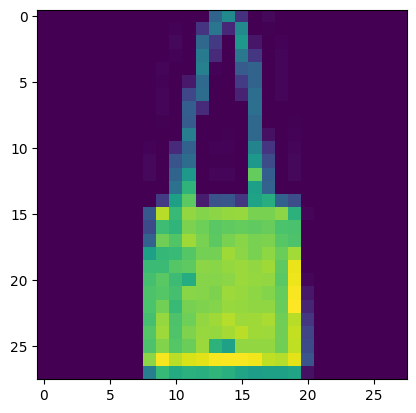

Bag


In [ ]:
# visualize individual datapoints
datapoint_id = 200

plt.figure()
plt.imshow(x_train[datapoint_id])
plt.grid(False)
plt.show()

print(label_names[y_train[100]])

In [ ]:
#Preprocessing the data
#Scaling the pixel values to a range [0-1]
#Training set and Testing set should be preprocessed in the same wayd.

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

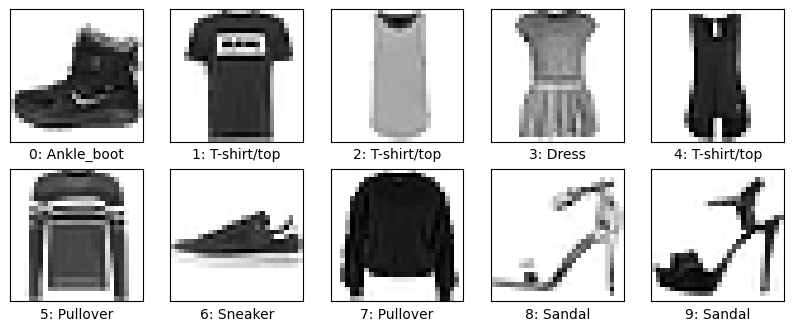

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  # plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(str(i) + ": " + label_names[y_train[i]])
plt.show()

In [ ]:
# Basic neural network model with one hiddden layer.
# Input layer is flattened.

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) #if model does not increase 3 times it will callback

nn_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28,28)),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(10, activation = 'softmax')
     ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nn_model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
nn_model.fit(x_train, y_train, epochs=5) #with 5 epochs

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7835 - loss: 0.6331
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8603 - loss: 0.3875
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8737 - loss: 0.3426
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8862 - loss: 0.3126
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8929 - loss: 0.2930


In [ ]:
nn_model.fit(x_train, y_train, epochs=100, callbacks=[callback]) #with 10 epochs

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9132 - loss: 0.2353
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9190 - loss: 0.2187
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9196 - loss: 0.2151
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9241 - loss: 0.2023
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9257 - loss: 0.2005
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9230 - loss: 0.1996
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9283 - loss: 0.1903
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9287 - loss: 0.1898
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9291 - loss: 0.1865
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9333 - loss: 0.1774
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9349 - loss: 0.1687
Epoch 12/100
1

In [ ]:
pred_loss, pred_acc = nn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.3379


In [ ]:
print("Loss: ", pred_loss * 100)
print("Accuracy: ", pred_acc * 100)

Loss:  33.61935615539551
Accuracy:  88.63999843597412
